<a href="https://colab.research.google.com/github/shznjihye/Learning/blob/main/new_lotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/excel11.csv', low_memory = False)
df.head()

# low_memory = True는 모든 데이터타입을 일일히 확인 / False는 하나로 통합

,num,A,B,C,D,E,F,bonus
0,1,10,23,29,33,37,40,16
1,2,9,13,21,25,32,42,2
2,3,11,16,19,21,27,31,30
3,4,14,27,30,31,40,42,2
4,5,16,24,29,40,41,42,3


In [4]:
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmb10',
 'STIXSizeTwoSym',
 'cmex10',
 'STIXGeneral',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmss10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'cmtt10',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans',
 'cmr10',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmsy10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'Liberation Sans',
 'Liberation Sans',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Humor Sans',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Sans Narro

In [5]:
lotto = df['A'].values.tolist() + df['B'].values.tolist() + df['C'].dropna().values.tolist() + df['D'].dropna().values.tolist()+ df['E'].dropna().values.tolist() + df['F'].dropna().values.tolist()
len(lotto)

5748

In [6]:
import numpy as np

In [7]:
lotto_s, s_number = np.unique(lotto, return_counts=True)

In [8]:
lotto_s

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [9]:
s_number

array([133, 126, 128, 133, 128, 118, 126, 128, 101, 134, 129, 137, 135,
       134, 130, 124, 137, 139, 131, 134, 127, 110, 114, 126, 123, 127,
       141, 119, 115, 117, 129, 110, 134, 147, 119, 128, 131, 128, 137,
       138, 118, 124, 141, 127, 133])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


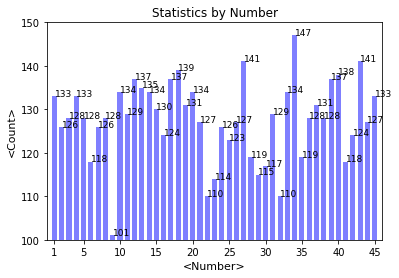

In [10]:
plt.bar(lotto_s, s_number, width=0.7, color='blue', alpha=0.5)
plt.title('Statistics by Number')
plt.xlabel('<Number>', fontsize=11)
plt.ylabel('<Count>', fontsize=11)
plt.axis([0,46,100, 150])

ax = plt.subplot()
ax.set_xticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])

for i, v in enumerate(lotto_s):
  plt.text(v, s_number[i], s_number[i], fontsize=9)

plt.savefig('stats.png')

In [11]:
df2 = pd.DataFrame({'num': lotto_s, 'count': s_number})
df2

,num,count
0,1,133
1,2,126
2,3,128
3,4,133
4,5,128
5,6,118
6,7,126
7,8,128
8,9,101
9,10,134


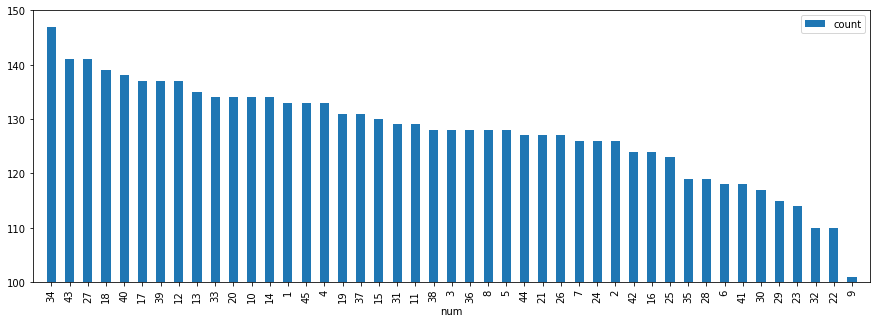

In [12]:
df2 = df2.groupby('num').mean().sort_values(['count'],ascending=False)
df2.plot(kind='bar', figsize=(15,5))
plt.axis([-1,45,100, 150])
plt.savefig('statsmax.png')

In [13]:
# 동행복권 사업 시작

df3 = df.loc[835:,:]
df3.head()

,num,A,B,C,D,E,F,bonus
835,836,1,9,11,14,26,28,19
836,837,2,25,28,30,33,45,6
837,838,9,14,17,33,36,38,20
838,839,3,9,11,12,13,19,35
839,840,2,4,11,28,29,43,27


In [14]:
new_lotto = df3['A'].values.tolist() + df3['B'].values.tolist() + df3['C'].dropna().values.tolist() + df3['D'].dropna().values.tolist()+ df3['E'].dropna().values.tolist() + df3['F'].dropna().values.tolist()
len(new_lotto)
lotto_n, n_number = np.unique(new_lotto, return_counts=True)

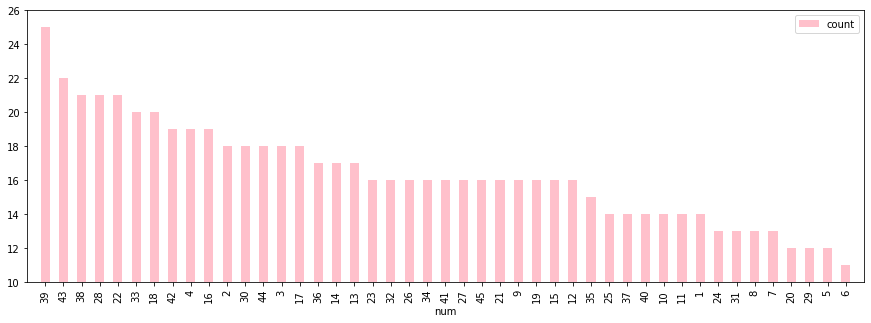

<Figure size 432x288 with 0 Axes>

In [22]:
n_df = pd.DataFrame({'num': lotto_n, 'count': n_number})
n_df = n_df.groupby('num').mean().sort_values(['count'],ascending=False)
n_df.plot(kind='bar', figsize=(15,5), color="pink")
plt.axis([-1,45,10, 26])
plt.show()
plt.savefig('statsmax.png')

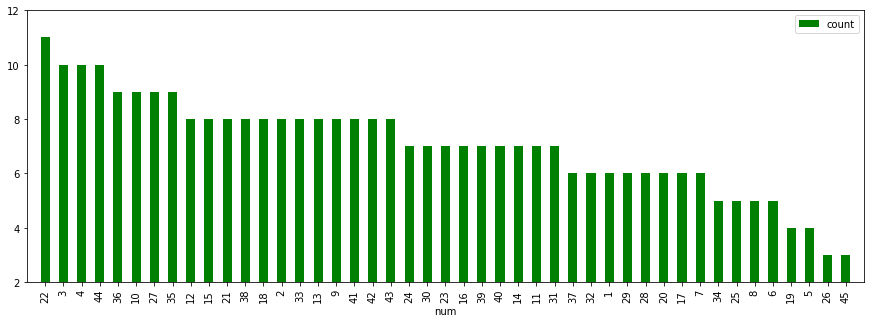

<Figure size 432x288 with 0 Axes>

In [25]:
# 1년 간 

df4 = df.loc[905:,:]
df4.head()
one_lotto = df4['A'].values.tolist() + df4['B'].values.tolist() + df4['C'].dropna().values.tolist() + df4['D'].dropna().values.tolist()+ df4['E'].dropna().values.tolist() + df4['F'].dropna().values.tolist()
len(one_lotto)
lotto_o, o_number = np.unique(one_lotto, return_counts=True)
o_df = pd.DataFrame({'num': lotto_o, 'count': o_number})
o_df = o_df.groupby('num').mean().sort_values(['count'],ascending=False)
o_df.plot(kind='bar', figsize=(15,5), color='green')
plt.axis([-1,45, 2, 12])
plt.show()
plt.savefig('stats1.png')